# Data analysis notebook

Before we train the models we started of with data analysis. This includes inspecting the pictures, checking the distribution of each class, finding patterns in the pictures. Several reasons are: 

1. Inspecting the content of the pictures is helpful for choosing the right CNN strategy (pre-trained network, transfer learning, or a model from scratch)  
2. Knowing the distribution of the classes gives some information for up- or downscaling
3. Getting a feeling for the content of the pictures may spark your creative imagination

In this Jupyter notebook we show some interesting findings and show the performance of our model

In [2]:
# First import all the relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
%matplotlib inline 


Using TensorFlow backend.


In [20]:
# Read the train and test frames
df = pd.read_csv('/Users/k.sinnige_enjins/Documents/The_Picnic_Hackathon_2019/data/train.tsv', delimiter='\t')
df_test = pd.read_csv('/Users/k.sinnige_enjins/Documents/The_Picnic_Hackathon_2019/data/test.tsv', delimiter='\t')
df_minus_tess = pd.read_csv('/Users/k.sinnige_enjins/Documents/The_Picnic_Hackathon_2019/data/images_minus_tess.tsv', delimiter='\t')

In [3]:
# Snippet of the data
df.head()

file                                label
0   0.png              Bananas, apples & pears
1   1.png                   Berries & cherries
2  2.jpeg                    Pork, beef & lamb
3   3.png                   Berries & cherries
4  4.jpeg  Bell peppers, zucchinis & eggplants

In [4]:
# There are 25 unique labels and 7259 images in the dataset
df.describe()

file                    label
count       7259                     7259
unique      7259                       25
top     3719.png  Bananas, apples & pears
freq           1                      851

In [5]:
# The test set has 820 pictures which is around 11% the size of the training set
df_test.describe()

file
count        820
unique       820
top     7381.png
freq           1

In [8]:
df_value_counts = pd.DataFrame(df['label'].value_counts()).reset_index()
df_value_counts.head()

index  label
0              Bananas, apples & pears    851
1                     Pre-baked breads    546
2  Bell peppers, zucchinis & eggplants    543
3        Cucumber, tomatoes & avocados    515
4                    Pork, beef & lamb    481

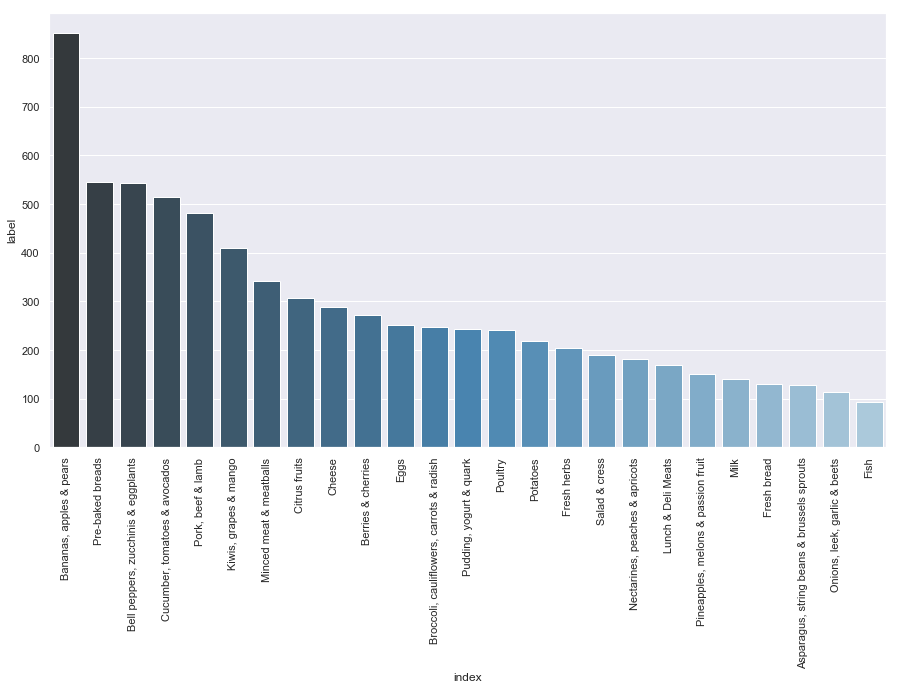

In [7]:
# Lets check the distribution in the training set
sns.set(rc={'figure.figsize':(15,8)})
figure = sns.barplot(x='index', y="label", data=df_value_counts, palette=("Blues_d"))
figure.set_xticklabels(figure.get_xticklabels(), rotation=90);


## Observations from distribution

Not all classes are equally balanced. But there is no extreme inbalance. Balancing might help the accuracy but could also lower the accuracy if the photos are of a bad quality and are upscaled by using image augmentation tecniques such as rotation, zoom, flip, etc. Secondly, Class balancing techniques are only really necessary when we actually care about the minority classes. Before training the model it is interesting to inspect the picture manualy

In [11]:
# Read 300 images for illustration

path = '/Users/k.sinnige_enjins/Documents/The_Picnic_Hackathon_2019/data/train'

X = []
y = []

for index, row in df[0:300].iterrows():
   
    img = image.load_img(path+'/'+row['file'], target_size=(224,224))
        
    X.append(img)
    y.append(row['label'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [57]:
df[df.label == 'Fish']

file label
19      19.jpeg  Fish
57      57.jpeg  Fish
86      86.jpeg  Fish
617     617.png  Fish
654    654.jpeg  Fish
687     687.png  Fish
800     800.png  Fish
810     810.png  Fish
873    873.jpeg  Fish
882    882.jpeg  Fish
912     912.png  Fish
1019   1019.png  Fish
1063  1063.jpeg  Fish
1229   1229.png  Fish
1310  1310.jpeg  Fish
1351  1351.jpeg  Fish
1389   1389.png  Fish
1451  1451.jpeg  Fish
1521   1521.png  Fish
1527   1527.png  Fish
1586   1586.png  Fish
1685   1685.png  Fish
1813  1813.jpeg  Fish
1823  1823.jpeg  Fish
1839  1839.jpeg  Fish
1925  1925.jpeg  Fish
2178   2178.png  Fish
2346  2346.jpeg  Fish
2428   2428.png  Fish
2432  2432.jpeg  Fish
...         ...   ...
4749   4751.png  Fish
4951  4954.jpeg  Fish
4959   4962.png  Fish
4989   4992.png  Fish
4999  5002.jpeg  Fish
5080  5083.jpeg  Fish
5292  5295.jpeg  Fish
5319   5322.png  Fish
5733   5737.png  Fish
5764   5768.png  Fish
5775  5779.jpeg  Fish
5980  5984.jpeg  Fish
6109   6113.png  Fish
6133   6137.png  Fish
6194  6198.jpeg  Fish
6429   6433.png  Fish
6474   6478.png  Fish
6512  6516.jpeg  Fish
6580  6584.jpeg  Fish
6604  6608.jpeg  Fish
6612  6616.jpeg  Fish
6687   6691.png  Fish
6708  6712.jpeg  Fish
6726   6730.png  Fish
6772   6776.png  Fish
6801   6805.png  Fish
7063   7067.png  Fish
7168  7172.jpeg  Fish
7172   7176.png  Fish
7231   7235.png  Fish

[94 rows x 2 columns]

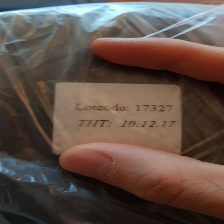

In [55]:
# Some fish photos
X[19]

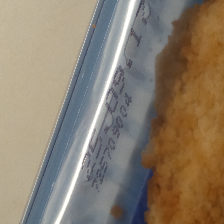

In [100]:
X[57]

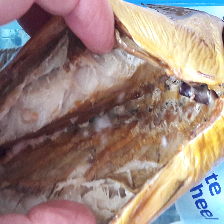

In [101]:
X[86]

In [104]:
# Some other classes
df.label.unique()

array(['Bananas, apples & pears', 'Berries & cherries',
       'Pork, beef & lamb', 'Bell peppers, zucchinis & eggplants',
       'Pudding, yogurt & quark', 'Minced meat & meatballs', 'Eggs',
       'Cucumber, tomatoes & avocados', 'Citrus fruits', 'Fish',
       'Onions, leek, garlic & beets', 'Kiwis, grapes & mango',
       'Fresh bread', 'Cheese', 'Salad & cress', 'Pre-baked breads',
       'Fresh herbs', 'Nectarines, peaches & apricots',
       'Lunch & Deli Meats', 'Milk', 'Potatoes',
       'Broccoli, cauliflowers, carrots & radish',
       'Asparagus, string beans & brussels sprouts', 'Poultry',
       'Pineapples, melons & passion fruit'], dtype=object)

In [112]:
df.file[df.label == 'Bananas, apples & pears'].values[0:10]

array(['0.png', '9.png', '12.png', '15.png', '22.jpeg', '34.png',
       '36.png', '65.png', '66.png', '70.png'], dtype=object)

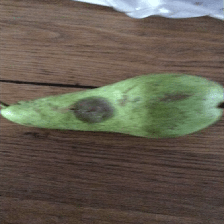

In [114]:
X[0]

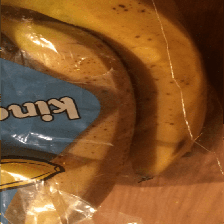

In [115]:
X[9]

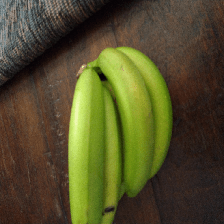

In [116]:
X[12]

In [117]:
# And some more
df.file[df.label == 'Pork, beef & lamb'].values[0:10]

array(['2.jpeg', '8.jpeg', '18.png', '26.jpeg', '46.jpeg', '81.jpeg',
       '102.jpeg', '112.jpeg', '115.jpeg', '118.jpeg'], dtype=object)

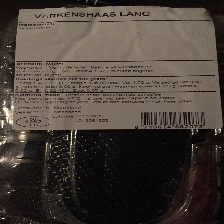

In [118]:
X[2]

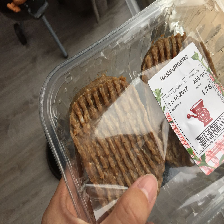

In [119]:
X[8]

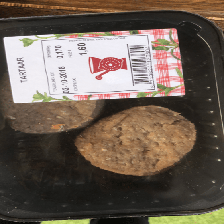

In [121]:
X[18]

## Observations from picture

From some small examples we can see that there are some pictures with labels as a sticker. This suggests that we can read the text to maybe identify the content of the picture by analyzing the text instead of classification by a cnn. Secondly we observe that there are some classes that have multiple different products so, mapping based on training ourselves can be usefull. Thirdly there are trained CNN's available that we can use to speed up the process of learning by using a method called transfer learning

## Introducing Tesseract!
<img src="https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/avengers-infinitywar-loki-tesseract-700x313.jpg" width="800" img align="left" />

**Explanation**: <br>
For reading text from images we can use a method called Optical Character Recognition (OCR) or sometimes simply text recognition. One such OCR system is Tesseract.Tesseract was originally developed at Hewlett-Packard Laboratories Bristol and at Hewlett-Packard Co, Greeley Colorado between 1985 and 1994, with some more changes made in 1996 to port to Windows, and some C++izing in 1998. In 2005 Tesseract was open sourced by HP. Since 2006 it is developed by Google (source: https://github.com/tesseract-ocr/tesseract)

The latest (LSTM based) stable version is 4.0.0, released on October 29, 2018. Latest source code for 4.0 is available from master branch on GitHub.

In our method we will try to extract text from all the images. Obviously, not all images contain labels with text information so only the images that return a result are analysed. If the text is successfully analysed, the target label will be assigned. For all the images that are not analysed, the CNN will try to classify them.

**Advantages:**
1. Labels with clear text often contain relevant information such as the product name. By reading this the overall accuracy can improve
2. By applying the Tesseract before the CNN, images that don't contain the product itself but only the label are removed and thus the remaining set will be cleaner. 
<br>

**Points for improvement:**
1. Flip images to better read text
2. If an image is to dark, try to increase the brightness 
3. Words need to be assigned to the labels. The current words are translations but could be improved by including other product names in the list. An example could be:  <br>*Gebraden Rosbief --> Lunch and delimeats*

In [4]:
df_value_counts_tess = pd.DataFrame(df_minus_tess['label'].value_counts()).reset_index()
df_value_counts_tess.head()

index  label
0              Bananas, apples & pears    848
1                     Pre-baked breads    546
2  Bell peppers, zucchinis & eggplants    540
3        Cucumber, tomatoes & avocados    505
4                Kiwis, grapes & mango    407

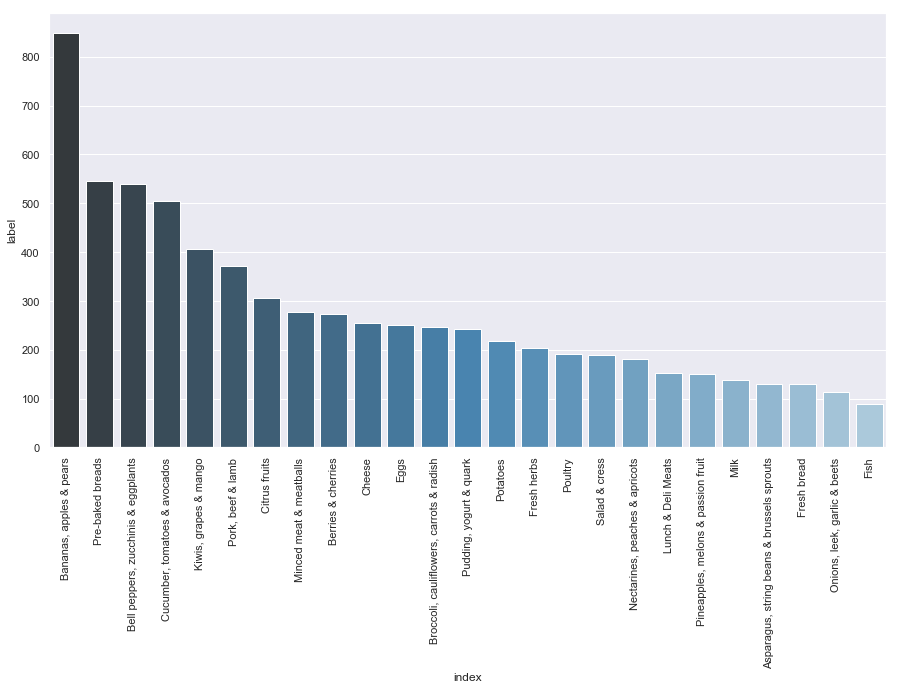

In [5]:
# Lets check the distribution in the training set
sns.set(rc={'figure.figsize':(15,8)})
figure = sns.barplot(x='index', y="label", data=df_value_counts_tess, palette=("Blues_d"))
figure.set_xticklabels(figure.get_xticklabels(), rotation=90);

In [12]:
'''By checking the difference between the trained dataset and the dataset after the tesseract,
    we see that the category pork, beef, lamb is predicted most often '''

df_difference = df_value_counts.merge(df_value_counts_tess, on='index')
df_difference['diff'] = df_difference['label_x'] - df_difference['label_y']
df_difference

index  label_x  label_y  diff
0                      Bananas, apples & pears      851      848     3
1                             Pre-baked breads      546      546     0
2          Bell peppers, zucchinis & eggplants      543      540     3
3                Cucumber, tomatoes & avocados      515      505    10
4                            Pork, beef & lamb      481      372   109
5                        Kiwis, grapes & mango      409      407     2
6                      Minced meat & meatballs      342      277    65
7                                Citrus fruits      307      305     2
8                                       Cheese      288      254    34
9                           Berries & cherries      273      273     0
10                                        Eggs      251      251     0
11    Broccoli, cauliflowers, carrots & radish      248      247     1
12                     Pudding, yogurt & quark      243      242     1
13                                     Poultry      241      191    50
14                                    Potatoes      218      217     1
15                                 Fresh herbs      204      203     1
16                               Salad & cress      189      189     0
17              Nectarines, peaches & apricots      182      181     1
18                          Lunch & Deli Meats      170      153    17
19          Pineapples, melons & passion fruit      150      150     0
20                                        Milk      140      138     2
21                                 Fresh bread      131      129     2
22  Asparagus, string beans & brussels sprouts      129      129     0
23                Onions, leek, garlic & beets      114      113     1
24                                        Fish       94       88     6

# Performance of the CNN

For the remaining photos we used a Transfer learning method that uses a pre-trained model. In our case the VGG-19 model performed the best. Besides VGG-19, the VGG-16 and Resnet-50 were also used but underperformed. After epoch 12 the model stopped improving. The accuracy on the validation set was 57.44% as seen below.

#### VGG-19
Epoch 12/100
205/204 [==============================] - 10262s 50s/step - loss: 1.3046 - acc: 0.6256 - val_loss: 1.6910 - val_acc: 0.5744

Epoch 00012: val_acc improved from 0.57025 to 0.57438, saving model to vgg19-model2.h5

#### Tesseract
The tesseract was able to read text in 5% of all the pictures in the training set. The accuracy was 83% on the training set

#### Combining models
Because the CNN is trained on all photos in the training set. The accuracy percentage of the combination is not possible to give. The reason being that we would run the model on a different train test split and therefore test on photos that were previously used for training. Our estimation for the performance would be between 57% - 65%.
